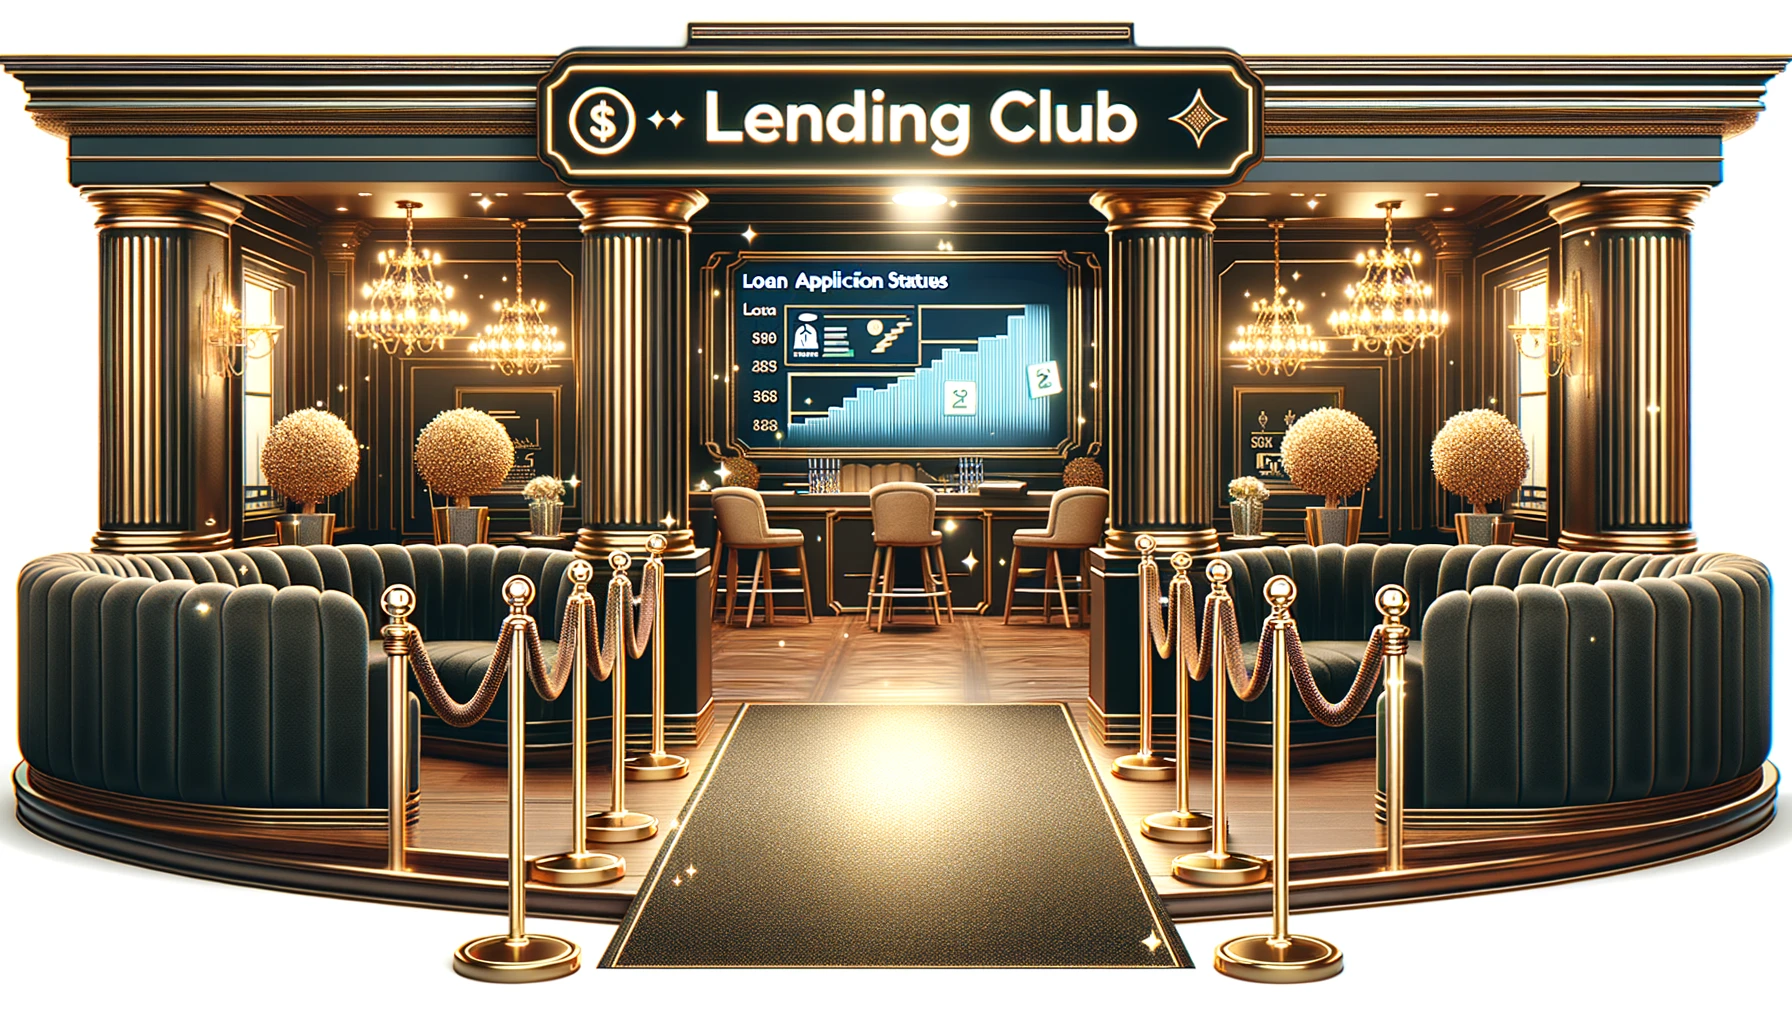

# Intro to Part IV

In this part two prediction models are prepared.

# Data load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import (
    precision_recall_curve,
    auc,
    recall_score,
    accuracy_score,
    f1_score,
    average_precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)

%load_ext nb_black
%config InlineBackend.figure_format = 'svg'

<IPython.core.display.Javascript object>

In [2]:
df_accept_clean = pd.read_csv(
    "/Users/drkazimieras/Turing College/Lending club/df_accept_clean.csv",
    low_memory=False,
)

<IPython.core.display.Javascript object>

In [3]:
df_accept_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_mnth,Interest rate,installment,emp_length_mnth,home_ownership,annual_inc,verification_status,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,emp_title_new,Grade_ordinal
0,3600.0,3600.0,3600.0,36,13.99,123.03,10,MORTGAGE,55000.0,Not Verified,...,0.0,178050.0,7746.0,2400.0,13734.0,0,Cash,0,Leader,3
1,24700.0,24700.0,24700.0,36,11.99,820.28,10,MORTGAGE,65000.0,Not Verified,...,0.0,314017.0,39475.0,79300.0,24667.0,0,Cash,0,Engineer,3
2,10400.0,10400.0,10400.0,60,22.45,289.91,3,MORTGAGE,104433.0,Source Verified,...,0.0,439570.0,95768.0,20300.0,88097.0,0,Cash,0,Other,6
3,20000.0,20000.0,20000.0,36,9.17,637.58,10,MORTGAGE,180000.0,Not Verified,...,0.0,388852.0,116762.0,31500.0,46452.0,0,Cash,0,Vice,2
4,20000.0,20000.0,20000.0,36,8.49,631.26,10,MORTGAGE,85000.0,Not Verified,...,0.0,193390.0,27937.0,14500.0,36144.0,0,Cash,0,Other,2


<IPython.core.display.Javascript object>

In [4]:
df_accept_clean.shape

(917472, 102)

<IPython.core.display.Javascript object>

# Data cleaning

In [5]:
X = df_accept_clean.drop(columns=["Grade_ordinal", "Interest rate"], axis=1)
y = df_accept_clean["Grade_ordinal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=93, stratify=y
)

<IPython.core.display.Javascript object>

In [6]:
cat_features = [feat_name for feat_name in X.columns if X[feat_name].dtype == "object"]
cat_features

['home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'title',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'disbursement_method',
 'emp_title_new']

<IPython.core.display.Javascript object>

In [7]:
num_features = [
    feat_name
    for feat_name in X.columns
    if X[feat_name].dtype == "int64" or X[feat_name].dtype == "float64"
]
num_features

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term_mnth',
 'installment',
 'emp_length_mnth',
 'annual_inc',
 'pymnt_plan',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'is_joint_application',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt

<IPython.core.display.Javascript object>

In [8]:
# Only numeric for PCA
X_num_PCA = df_accept_clean[num_features]

<IPython.core.display.Javascript object>

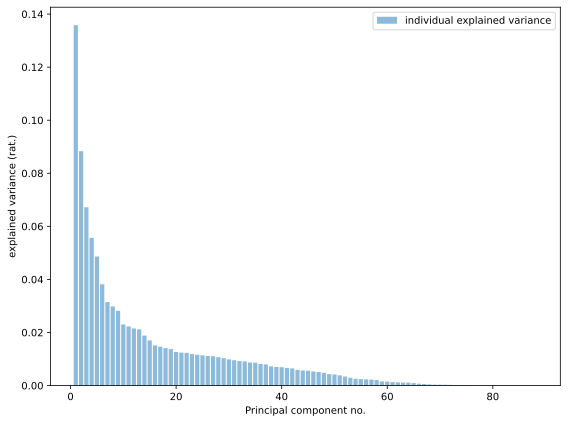

<IPython.core.display.Javascript object>

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num_PCA)

# PCA without reduced dimensionality
pca = PCA()
pca.fit(X_scaled)

# cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.bar(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    alpha=0.5,
    align="center",
    label="individual explained variance",
)

plt.ylabel("explained variance (rat.)")
plt.xlabel("Principal component no.")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Elbow point seems to be at around 20.

Using PCA results in TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative. Co-pilot suggests to use TruncatedSVD instead of PCA.

In [ ]:
# Random forest for classification of grades.

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(), cat_features),
    ]
)
# TruncatedSVD instead of PCA

model = imbpipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("truncatedSVD", TruncatedSVD(n_components=20, random_state=42)),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy:.1f}")
print(f"Recall: {recall:.1f}")
print(f"Precision: {precision:.1f}")
print(f"F1 Score: {f1:.1f}")

In [ ]:
X = df_accept_clean.drop(columns=["Interest rate"], axis=1)
y = df_accept_clean["Interest rate"]

# no stratify since a regression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=93
)

In [ ]:
cat_features = [feat_name for feat_name in X.columns if X[feat_name].dtype == "object"]
cat_features

In [ ]:
num_features = [
    feat_name
    for feat_name in X.columns
    if X[feat_name].dtype == "int64" or X[feat_name].dtype == "float64"
]
num_features

In [ ]:
# LinearRegression for int. rate.

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features),
    ]
)


regression_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression(random_state=93)),
    ]
)

regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

print(f"R^2 score: {r2_score(y_test, y_pred):.1f}")
print(f"MSerror: {mean_squared_error(y_test, y_pred):.1f}")